## Pytorch Workflow
End to End pytorch workflow

1. Data preparation
2. Building model
3. Fitting the model to data (Training) model
4. Making predictions and evaluating a model (Inference)
5. Saving and loading a model
6. Putting all together

In [266]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

In [267]:
torch.__version__

'2.4.1+cu121'

## 1. Data Preparation
Data can be almost anything
* Excel spreadsheet
* Images and Videos
* Audio
* Text

In [268]:
## using linear regression formula.
## y = a + bx

weight = 0.7
bias = 0.3

## creating some data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # add extra dimension
y = weight * X + bias

X[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]))

In [269]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [270]:
## Splitting the data into training and testing set.

train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [271]:
## function for visualizing our dataset

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  '''
  Plots training data, test data and compares predictions.
  '''
  plt.figure(figsize=(9,6))
  # plot the training data
  plt.scatter(train_data, train_labels, label="training data", c="b")
  # plot the test data
  plt.scatter(test_data, test_labels, label="test data", c="g")
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, label="predictions", c="r")
  plt.legend()
  plt.show()

In [272]:

## Visualizing

# plt.scatter(x=x_train, y=y_train, c="b",s=4, label="training data")
# plt.scatter(x=x_test, y=y_test, c="g", s=4, label="testing data")
# plt.legend()

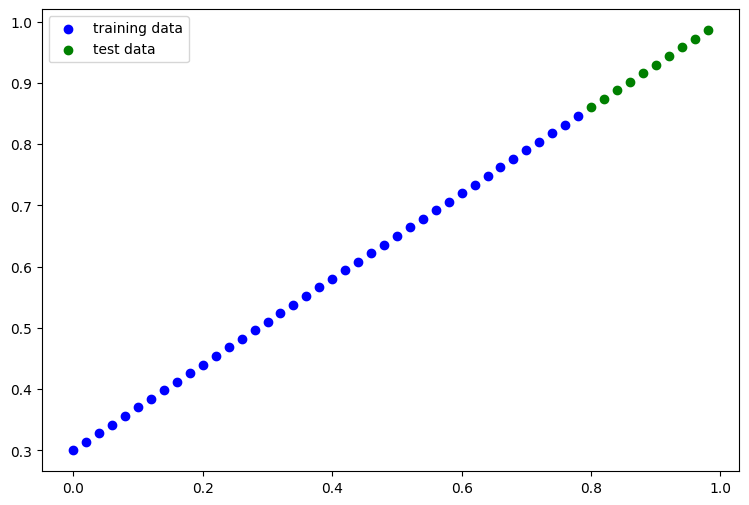

In [273]:
plot_predictions()

## 2. Building our model
Linear Regression model

In [274]:
torch.__version__

'2.4.1+cu121'

In [275]:
# creating a linear regression model class
# nn.Module has lot of helpful things that we can use for building model.
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # some random numbers at start
    # requires_grad=True for allowing Gradient descent to update
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    '''
    Forward pass of our model.
    '''
    # linear regression (bX + c)
    return self.weight * x + self.bias

### Pytorch model building essentials

* torch.nn - components for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn
* torch.nn.Module - base class for all neural network module, if we subclass we should overwrite forward()
* torch.optim - optimizers in pytorch for helping with gradient descent
* def forwared() - all nn.Module subclass require us to overwrite it

### Checking the contents of our Pytorch model


In [276]:
# creating a random seed
RANDOM_SEED = 2
torch.manual_seed(RANDOM_SEED)

# creating an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [277]:
# checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], requires_grad=True)]

In [278]:
torch.manual_seed(2)
torch.randn(1)

tensor([0.3923])

In [279]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3923])), ('bias', tensor([-0.2236]))])

In [280]:
weight, bias # we want to get close to these values by learning

(0.7, 0.3)

### Making prediction on random value

when we pass data through our model it is going to run through `**forward**` method.

In [281]:
y_preds = model_0(x_test)
y_preds

tensor([[0.0903],
        [0.0981],
        [0.1060],
        [0.1138],
        [0.1217],
        [0.1295],
        [0.1373],
        [0.1452],
        [0.1530],
        [0.1609]], grad_fn=<AddBackward0>)

In [282]:
# making predictin with model
with torch.inference_mode(): # turns of the gradient tracking (Preferred mode)
  y_preds = model_0(x_test)

y_preds

tensor([[0.0903],
        [0.0981],
        [0.1060],
        [0.1138],
        [0.1217],
        [0.1295],
        [0.1373],
        [0.1452],
        [0.1530],
        [0.1609]])

In [283]:
with torch.no_grad(): # another method to inference
  y_preds = model_0(x_test)

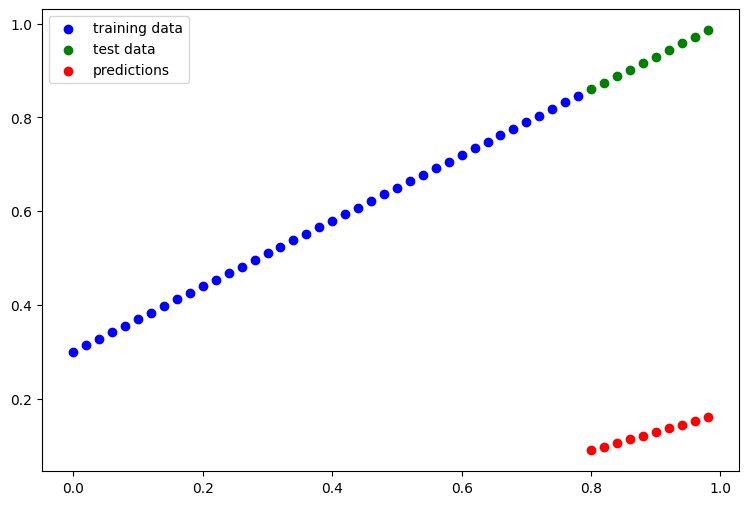

In [284]:
# visualizing the prediction
plot_predictions(predictions=y_preds)

### 3. Training model
Model to move from some unknown parameters to known parameters or to better representation of the data by training data.

We can measure how good or poor our model is by using loss function. They are also called cost function or criterion in different area for measuring how good our model.

* **Loss Function** : A function to measure how wrong our model prediction are to the ideal outputs, lower is better for model.
* **Optimizer** : Take into account the loss of a model and adjusts the model parameter (weight and bias)

In [285]:
model_0.parameters()

<generator object Module.parameters at 0x7f813d3c5d90>

In [286]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], requires_grad=True)]

In [287]:
# Setting up a loss function
loss_fn = nn.L1Loss() # Mean Absolute Error

# Setting up optimizer
optimizer = torch.optim.SGD( # Stochastic Gradient Descent
    params=model_0.parameters(), # what params to optimize for
    lr=0.01 # hyperparameter (Learning Rate)
)

### Building Training Loop and Testing loop
What we need in a training loop
1. Loop through the data
2. Forward pass ( this involves data moving through our model's `**forward()**` method )  to make prediction on data
3. Calculate the loss (compare forward pass prediction to ground truth labels)
4. Optimize zero grad
5. Loss backward - move backward to calculate gradients of each parameters with respect to the loss `backpropagation`
6. Optimizer step - use the optimizer to adjust model parameter to improve the loss `gradient descent` algorithm.

In [288]:
epochs = 100 # how many loop on data

# Tracking experiment
epoch_count = []
loss_values = []
test_loss_values = []

# 1. Loop through the data
for epoch in range(epochs):
  model_0.train() # train() method from nn.Module sets all parameters  that require gradients to require gradient

  # 2. Forward pass data
  y_preds = model_0(x_train)

  # 3. Calculate loss
  loss = loss_fn(y_preds, y_train) # from our loss fun defined L1Loss earlier

  # 4. Optimizer zero grad
  optimizer.zero_grad()

  # 5. Perform back progation
  loss.backward()

  # 6. Step the optimizer (perform SGD)
  optimizer.step()

  model_0.eval() # turn of gradient

  # Testing
  with torch.inference_mode():
    # do the forward pass in testing
    test_preds = model_0(x_test)

    # calculate the loss value
    test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.6435682773590088 | Test Loss: 0.7839487791061401
Epoch: 10 | Loss: 0.5283582806587219 | Test Loss: 0.6492388844490051
Epoch: 20 | Loss: 0.41314831376075745 | Test Loss: 0.5145289897918701
Epoch: 30 | Loss: 0.2979383170604706 | Test Loss: 0.3798190653324127
Epoch: 40 | Loss: 0.1827283352613449 | Test Loss: 0.24510908126831055
Epoch: 50 | Loss: 0.06751836836338043 | Test Loss: 0.11039917171001434
Epoch: 60 | Loss: 0.016020705923438072 | Test Loss: 0.03857617825269699
Epoch: 70 | Loss: 0.012479040771722794 | Test Loss: 0.028251904994249344
Epoch: 80 | Loss: 0.009042811580002308 | Test Loss: 0.020666247233748436
Epoch: 90 | Loss: 0.005614229943603277 | Test Loss: 0.012393707409501076


In [289]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6891], requires_grad=True),
 Parameter containing:
 tensor([0.3044], requires_grad=True)]

In [290]:
# epochs = 10

# for epoch in range(epochs):
#   model_0.train()
#   y_preds = model_0(x_train)
#   loss = loss_fn(y_preds, y_train)
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()

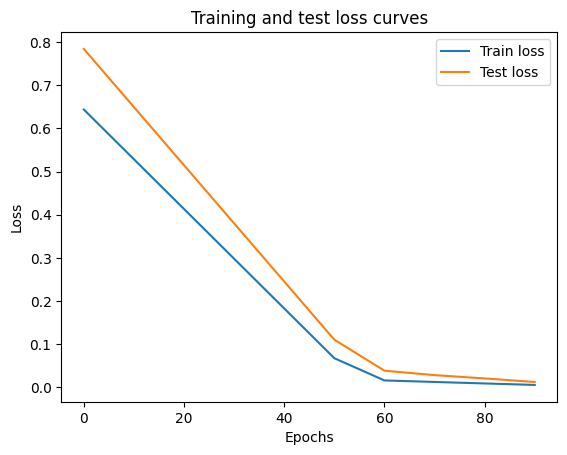

In [296]:
# plot the loss curves
import numpy as np
train_loss_values = torch.tensor(loss_values).numpy() # because error due to torch tensor

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [291]:
with torch.inference_mode():
  y_preds = model_0(x_test)

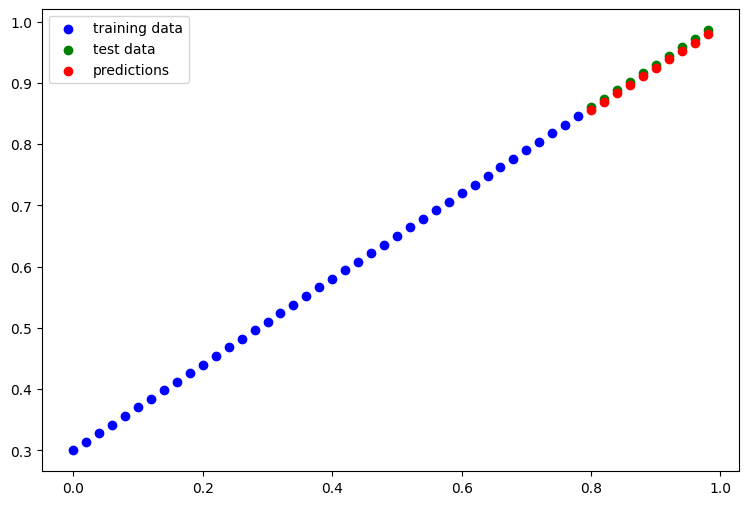

In [292]:
plot_predictions(predictions=y_preds)

In [297]:
model_0

LinearRegressionModel()

### Saving a model in Pytorch
Three ways to save and load a model:

1. `torch.save()` - allows us to save a pytorch model in python object pickle format
2. `torch.load()` - allows us to load a saved model
3. `torch.nn.Module.load_state_dict()` - allows to load a models state saved dict

- Saving a whole model vs saving state_dict?

In [298]:
# saving our model
from pathlib import Path

# creating model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# model save path
MODEL_NAME = "01_pytorch_model_0.pth" # use .pth/.pt to save
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_model_0.pth')

In [299]:
# save the model state_dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [303]:
# loading saved model state dict

# to load state dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-303-f4f8e25776e9>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [305]:
loaded_model_0

LinearRegressionModel()

In [307]:
list(loaded_model_0.parameters())

[Parameter containing:
 tensor([0.6891], requires_grad=True),
 Parameter containing:
 tensor([0.3044], requires_grad=True)]